## RFM Analysis

* The RFM Analysis is a data modeling technique that helps to determine customer value at a point in time. RFM stands for Recency, Frequency and Monetary, three key indicators of customer value.

* The data set called Online Retail II includes the sales of a UK-based online retail store between 01/12/2009 - 09/12/2011. 

### Our dataset variables 


* InvoiceNo
* StockCode
* Description
* Quantity
* InvoiceDate
* UnitPrice
* CustomerID
* Country

In [2]:
# Necesseray Libraries 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# İmport dataset
df_2010_2011 = pd.read_excel("online_retail_II.xlsx", sheet_name = "Year 2010-2011")

# Copy dataset
df = df_2010_2011.copy()


In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom


In [6]:
# Unique product number

df.Description.nunique()

4223

In [15]:
# how many of which product do you have?

df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
Name: Description, dtype: int64

In [16]:
# The most ordered items.

df.groupby("Description")["Quantity"].agg("sum").sort_values(ascending=False).head()

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS    53847
JUMBO BAG RED RETROSPOT              47363
ASSORTED COLOUR BIRD ORNAMENT        36381
POPCORN HOLDER                       36334
PACK OF 72 RETROSPOT CAKE CASES      36039
Name: Quantity, dtype: int64

In [18]:
# How many Invoice are there in total? 

df.Invoice.nunique()

25900

In [21]:
# Finding Total Price

df["TotalPrice"] = df.Quantity * df.Price
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,3,17850,United Kingdom,15
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,3,17850,United Kingdom,22
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3,17850,United Kingdom,20
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3,17850,United Kingdom,20


In [23]:
# Most expensive products 

df.groupby("Description")["Price"].agg("max").sort_values(ascending=False).head()

Description
Manual            38970
AMAZON FEE        17836
Adjust bad debt   11062
POSTAGE            8143
DOTCOM POSTAGE     4505
Name: Price, dtype: float64

In [26]:
# Orders by Countries

df.Country.value_counts().head()

United Kingdom    495478
Germany             9495
France              8558
EIRE                8196
Spain               2533
Name: Country, dtype: int64

In [30]:
# Which country earned how much?

df.groupby("Country")["TotalPrice"].agg("sum").sort_values(ascending=False).head()

Country
United Kingdom   8187806
Netherlands       284662
EIRE              263277
Germany           221698
France            197422
Name: TotalPrice, dtype: float64

In [34]:
# returned products and their amounts 

df[df["Invoice"].str.contains("C",na=False)].sort_values("Quantity",ascending=True).head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2,16446,United Kingdom,-168470
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1,12346,United Kingdom,-77184
4268,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0,15838,United Kingdom,-281
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2,15749,United Kingdom,-6539
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,2,15749,United Kingdom,-3700


## Prepearing Data

In [36]:
# How many data is null?
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
TotalPrice          0
dtype: int64

In [37]:
# We have 500k rows of dataset. We can delete nulls.
df.dropna(inplace=True)

In [43]:
# We can also see quarters 

df.describe([0.1,0.25,0.5,0.75,.85]).T

,count,mean,std,min,10%,25%,50%,75%,85%,max
Quantity,406830,12,249,-80995,1,2,5,12,18,80995
Price,406830,3,69,0,1,1,2,4,5,38970
Customer ID,406830,15288,1714,12346,12876,13953,15152,16791,17426,18287
TotalPrice,406830,20,428,-168470,2,4,11,20,26,168470


In [48]:
# Now, we calculate IOR and we use it for Outliers.

for feature in ["Quantity","Price","TotalPrice"]:

    Q1 = df[feature].quantile(0.01)
    Q3 = df[feature].quantile(0.99)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
    
    if df[(df[feature] > upper) | (df[feature] < lower)].any(axis=None):
        print(feature, "Outliers amount: ",df[(df[feature] > upper) | (df[feature] < lower)].shape[0])
    else:
        print(feature, "no")

Quantity Outliers amount:  948
Price Outliers amount:  846
TotalPrice Outliers amount:  1030


## Recency

* The time between your customer’s last order and the report date. The shorter the period of time between the last purchase and today, the more likely the customer will keep the brand in the consideration set.

* Recency Score = Today Date - Last purchase time

In [56]:
# We will take aciton with last purchase time of dataset.
import datetime as dt
df["InvoiceDate"].max() # think like today date 


Timestamp('2011-12-09 12:50:00')

In [58]:
today_date = dt.datetime(2011,12,9,0,0)
today_date

datetime.datetime(2011, 12, 9, 0, 0)

In [65]:
# last dates about purchase

df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()

,InvoiceDate
Customer ID,
12346,2011-01-18 10:17:00
12347,2011-12-07 15:52:00
12348,2011-09-25 13:13:00
12349,2011-11-21 09:51:00
12350,2011-02-02 16:01:00


In [66]:
# Now, we will Catch the Receny values by customers
# Before this action, we should convert Customer ID type to int because we are dealing with datetime.After we will able to extraction process  with today date. 

df["Customer ID"] = df["Customer ID"].astype(int)
bp_df = (today_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
bp_df.head()

,InvoiceDate
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [67]:
bp_df.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
bp_df.head()

,Recency
Customer ID,
12346,324 days 13:43:00
12347,1 days 08:08:00
12348,74 days 10:47:00
12349,17 days 14:09:00
12350,309 days 07:59:00


In [100]:
# Deleting Days 

recency = bp_df.Recency.apply(lambda x: x.days)
recency.head()

Customer ID
12346    324
12347      1
12348     74
12349     17
12350    309
Name: Recency, dtype: int64

## Frequency 

* The total number of orders the customer had in the RFM Analysis time frame. For everyday consumables, more is better. For items that have predictable purchase cycles, or seasonality, frequency provides key dates to plan for.

In [93]:
frequency = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
frequency.head()

Invoice
Customer ID Invoice         
12346       541431         1
            C541433        1
12347       537626        31
            542237        29
            549222        24

In [94]:
# count of Invoice  according to Customer will give us to Frequency.

frequency.groupby("Customer ID").agg({"Invoice":"count"}).head()

,Invoice
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


In [95]:
freq_df = frequency.groupby("Customer ID").agg({"Invoice":"count"})
freq_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
freq_df.head()

,Frequency
Customer ID,
12346,2
12347,7
12348,4
12349,1
12350,1


## Monetary 

* The average amount per order for all orders during the analysis time frame. Conventional wisdom says to protect those high spenders, but sometimes higher ROI moves are found shifting people from mid-range spending segments to higher levels through personalized messaging and offers.

In [96]:
# We need TotatPrice sum by Customer

monetary = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary.head()

,TotalPrice
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [97]:
monetary.rename(columns = {"TotalPrice": "Monetary"}, inplace = True)
monetary.head()

,Monetary
Customer ID,
12346,0
12347,4310
12348,1797
12349,1758
12350,334


In [101]:
# We have all parameters. Now we concat these of parameters.

rfm = pd.concat([recency, freq_df, monetary],  axis=1)
rfm.head()

,Recency,Frequency,Monetary
Customer ID,,,
12346,324,2,0
12347,1,7,4310
12348,74,4,1797
12349,17,1,1758
12350,309,1,334


In [104]:
# We will use pd.qcut func, this func will help us to categorize recency, frequency and monetary series.

rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method = "first"), 5, labels = [1,2,3,4,5])
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels = [1,2,3,4,5])
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
Customer ID,,,,,,
12346,324,2,0,1,2,1
12347,1,7,4310,5,4,5
12348,74,4,1797,2,3,4
12349,17,1,1758,4,1,4
12350,309,1,334,1,1,2


In [105]:
# Getting scores

(rfm['RecencyScore'].astype(str) + 
 rfm['FrequencyScore'].astype(str) + 
 rfm['MonetaryScore'].astype(str)).head()

Customer ID
12346    121
12347    545
12348    234
12349    414
12350    112
dtype: object

In [107]:
# we can add rfm score to dataframe, we can see all together in this way.

rfm["RFM_SCORE"] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str) + rfm['MonetaryScore'].astype(str)
rfm.head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346,324,2,0,1,2,1,121
12347,1,7,4310,5,4,5,545
12348,74,4,1797,2,3,4,234
12349,17,1,1758,4,1,4,414
12350,309,1,334,1,1,2,112


In [111]:
# The best customers

rfm[rfm["RFM_SCORE"] == rfm["RFM_SCORE"].max()].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12362,2,13,5155,5,5,5,555
12417,2,12,3579,5,5,5,555
12437,0,19,4897,5,5,5,555
12471,1,49,18741,5,5,5,555
12476,0,20,6547,5,5,5,555


In [112]:
# The worst customer

rfm[rfm["RFM_SCORE"] == rfm["RFM_SCORE"].min()].head()

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12353,203,1,89,1,1,1,111
12361,286,1,190,1,1,1,111
12401,302,1,84,1,1,1,111
12402,322,1,226,1,1,1,111
12441,365,1,174,1,1,1,111


## Segmenting Customers

### There are 10 segment/group about customers. 


* 'Hibernating'
* 'At Risk'
* 'Can\'t Loose'
* 'About to Sleep'
* 'Need Attention'
* 'Loyal Customers'
* 'Promising'
* 'New Customers'
* 'Potential Loyalists'
* 'Champions'

In [114]:
groups = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Can\'t Loose',
    r'3[1-2]': 'About to Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}


rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)
rfm['Segment'] = rfm['Segment'].replace(groups, regex=True)
rfm.head()


,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346,324,2,0,1,2,1,121,Hibernating
12347,1,7,4310,5,4,5,545,Champions
12348,74,4,1797,2,3,4,234,At Risk
12349,17,1,1758,4,1,4,414,Promising
12350,309,1,334,1,1,2,112,Hibernating


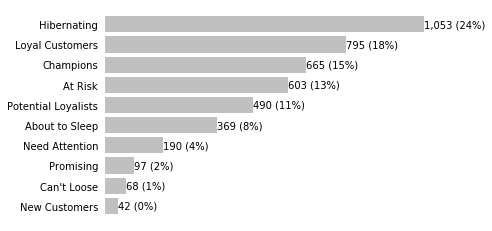

In [115]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['Can\'t loose']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

*We found all group of customers.*

*We should take care of some groups at this point.* 

*Because some of groups could be lost, strategy and planning departman should be careful about these groups.*

*Four groups can be select at this point.* 

* Champions
* About to Sleep
* Need Attention
* Can't Loose